### Detector Systematics 
- Load the DetVar samples, applies the nue selection on them
- The after selection pickl is used to study the variations

-- efficieny at different stages

-- in function of a variable (plot)

In [1]:
import nue_selection_helper as nue_helper
from helpers import helpfunction as helper
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle('./input/July2020/nu_new_slimmed.pckl')

In [3]:
#data = data['nu']

In [4]:
knobs = [k for k in data['mc'].keys() if 'up' in k]

(array([1.661500e+04, 1.000000e+01, 9.000000e+00, 6.000000e+00,
        3.500000e+01, 1.274000e+03, 6.295000e+03, 2.359737e+06,
        2.964780e+05, 6.414260e+05, 1.281760e+05, 5.258000e+04,
        2.862500e+04, 1.854500e+04, 1.329200e+04, 1.138400e+04,
        9.157000e+03, 6.079000e+03, 3.410000e+03, 2.344000e+03,
        1.961000e+03, 1.564000e+03, 1.403000e+03, 1.321000e+03,
        1.158000e+03, 1.001000e+03, 8.850000e+02, 7.970000e+02,
        7.140000e+02, 6.620000e+02]),
 array([0.        , 0.13333333, 0.26666667, 0.4       , 0.53333333,
        0.66666667, 0.8       , 0.93333333, 1.06666667, 1.2       ,
        1.33333333, 1.46666667, 1.6       , 1.73333333, 1.86666667,
        2.        , 2.13333333, 2.26666667, 2.4       , 2.53333333,
        2.66666667, 2.8       , 2.93333333, 3.06666667, 3.2       ,
        3.33333333, 3.46666667, 3.6       , 3.73333333, 3.86666667,
        4.        ]),
 <a list of 30 Patch objects>)

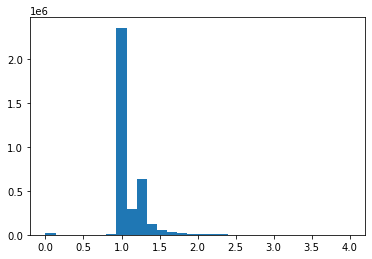

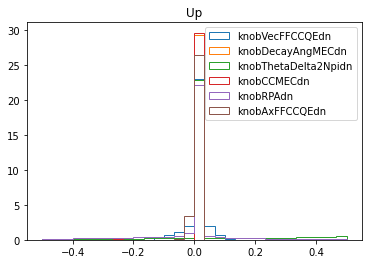

In [8]:
for k in knobs:
    up_weights = np.clip(np.nan_to_num(data['mc'][k], nan=1, posinf=1, neginf=1),0,20)
    up_weights = np.where(up_weights!=0, up_weights, 1)
    k = k.replace('up','dn')
    down_weights = np.clip(np.nan_to_num(data['mc'][k], nan=1, posinf=1, neginf=1),0,20)
    down_weights = np.where(down_weights!=0, down_weights, 1)
    plt.hist(up_weights-down_weights, range=(-0.5,0.5), bins=30, density=1, label=k, histtype='step')
plt.legend()
plt.title('Up')
plt.show()

In [5]:
write_pickle = False
outfile = './input/Jun2020/lite/sys_after_training.pckl'
input_dir = "./input/Jun2020/syst/"
output_dir = "./output/"

In [3]:
samples = ['_'.join(f.split('/')[-1].split('.')[0].split('_')[:-1]) for f in glob.glob(input_dir+'*.pckl')]

In [4]:
if write_pickle:
    nue_helper.CreateAfterTraining(samples, input_dir, one_file=outfile)
data = pd.read_pickle(outfile)

In [5]:
data.keys()

dict_keys(['nue_DetVar_WireModAngleYZ', 'nue_DetVar_LYRayleigh', 'nue_DetVar_LYAttenuation', 'nue_DetVar_wiremod_ScaleYZ', 'nue_DetVar_LYDown', 'nue_DetVar_wiremod_ScaledEdX', 'nue_DetVar_WireModAngleXZ', 'nue_DetVar_CV', 'nue_DetVar_wiremod_ScaleX'])

In [6]:
# We grouped by 'event' was this a smart choice?
for sample in samples:
    assert len(np.unique(data[sample]['daughters'].xs(0, level='daughter').index)) == len(data[sample]['daughters'].xs(0, level='daughter').index)

In [27]:
for sample in samples:
    data[sample]['daughters']['nueccinc_new'] = data[sample]['daughters']['category'].isin([1,10,11])
    num_w = data[sample]['daughters'].eval('nueccinc*weightSplineTimesTune').xs(0, level='daughter')
    den_w = data[sample]['mc']['weightSplineTimesTune'][data[sample]['mc']['nueccinc']]
    print('{:<30}\t Efficiency: {:0.1%}+-{:0.1%}'.format(sample, *helper.effErr(num_w, den_w) ))

nue_DetVar_WireModAngleYZ     	 Efficiency: 84.2%+-0.2%
nue_DetVar_LYRayleigh         	 Efficiency: 84.1%+-0.2%
nue_DetVar_LYAttenuation      	 Efficiency: 83.8%+-0.2%
nue_DetVar_wiremod_ScaleYZ    	 Efficiency: 83.8%+-0.2%
nue_DetVar_LYDown             	 Efficiency: 84.6%+-0.2%
nue_DetVar_wiremod_ScaledEdX  	 Efficiency: 83.6%+-0.2%
nue_DetVar_WireModAngleXZ     	 Efficiency: 84.0%+-0.2%
nue_DetVar_CV                 	 Efficiency: 84.1%+-0.2%
nue_DetVar_wiremod_ScaleX     	 Efficiency: 83.8%+-0.2%
